# Data Exploration and Visualization

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load dataset
cleaned_df= pd.read_csv('../dataset/manila-solcast-clean.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,2018-12-31,12,2018-12-31,24.590000,55.840000,93.600000,1000.780000,66.400000,7.910000,0.300000,152.200000,152.100000
1,2019-01-01,1,2019-01-01,25.133333,49.125000,88.500000,1001.458333,71.500000,7.108333,113.166667,264.833333,204.666667
2,2019-01-02,1,2019-01-02,25.975000,41.666667,82.416667,1002.083333,67.750000,7.908333,462.250000,414.500000,147.083333
3,2019-01-03,1,2019-01-03,25.500000,46.783333,87.750000,1003.291667,69.416667,6.958333,153.250000,281.000000,194.666667
4,2019-01-04,1,2019-01-04,26.516667,33.250000,73.666667,1004.208333,70.000000,8.108333,523.416667,438.833333,130.916667


In [3]:
# descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,6.519782,29.321523,48.685994,65.100298,1005.308747,145.873021,3.505705,279.300021,383.366876,191.955621
std,3.459161,1.734813,11.445090,7.338942,4.235407,72.072960,1.848808,178.135323,108.158963,49.325909
min,1.000000,24.333333,21.591667,48.000000,993.292857,32.153846,0.766667,0.000000,26.916667,26.250000
25%,4.000000,28.191667,40.216667,60.083333,1003.442857,79.583333,2.076923,131.416667,315.307692,158.000000
50%,7.000000,29.521429,51.016667,63.666667,1005.941667,130.916667,3.142857,265.916667,390.666667,191.384615
75%,10.000000,30.450000,58.028571,68.384615,1008.107143,208.230769,4.500000,412.357143,468.428571,229.857143
max,12.000000,33.600000,69.928571,93.600000,1015.925000,337.083333,11.908333,748.666667,604.416667,324.153846


In [4]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_GHI          0
Daily_radiation    0
dtype: int64

In [5]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       733 non-null    object 
 1   MonthPE          733 non-null    int64  
 2   Date             733 non-null    object 
 3   Daily_Temp       733 non-null    float64
 4   Daily_Precip     733 non-null    float64
 5   Daily_Humidity   733 non-null    float64
 6   Daily_Pressure   733 non-null    float64
 7   Daily_WindDir    733 non-null    float64
 8   Daily_WindSpeed  733 non-null    float64
 9   Daily_DNI        733 non-null    float64
 10  Daily_GHI        733 non-null    float64
 11  Daily_radiation  733 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 68.8+ KB


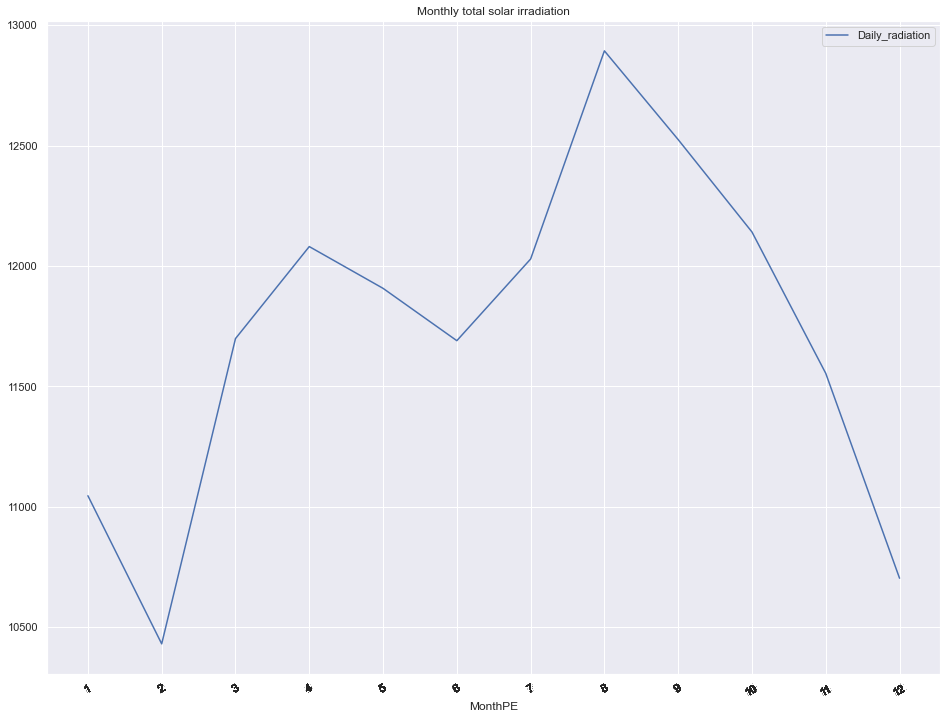

In [6]:
# plot of total irradiation for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

Locator attempting to generate 4025 ticks ([-36.4, ..., 768.4000000000115]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4025 ticks ([-36.4, ..., 768.4000000000115]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4025 ticks ([-36.4, ..., 768.4000000000115]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4025 ticks ([-36.4, ..., 768.4000000000115]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4025 ticks ([-36.4, ..., 768.4000000000115]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4025 ticks ([-36.4, ..., 768.4000000000115]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4025 ticks ([-36.4, ..., 768.4000000000115]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4025 ticks ([-36.4, ..., 768.4000000000115]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4025 ticks ([-36.4, ..., 768.400000000011

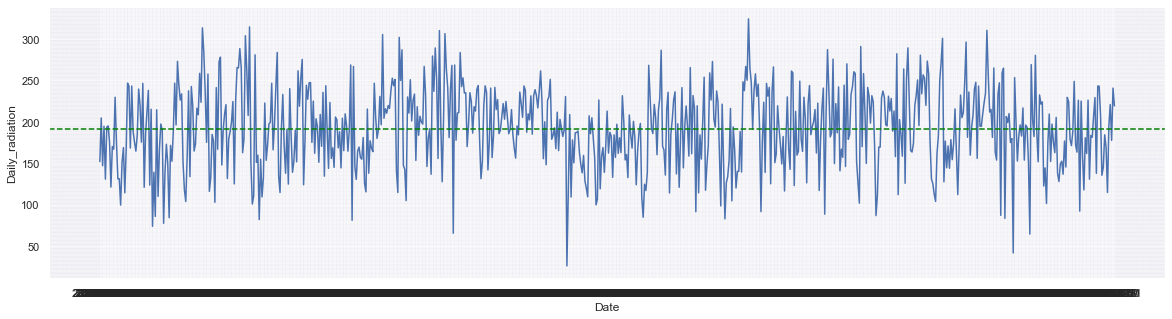

In [7]:
# daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()
ax.legend()

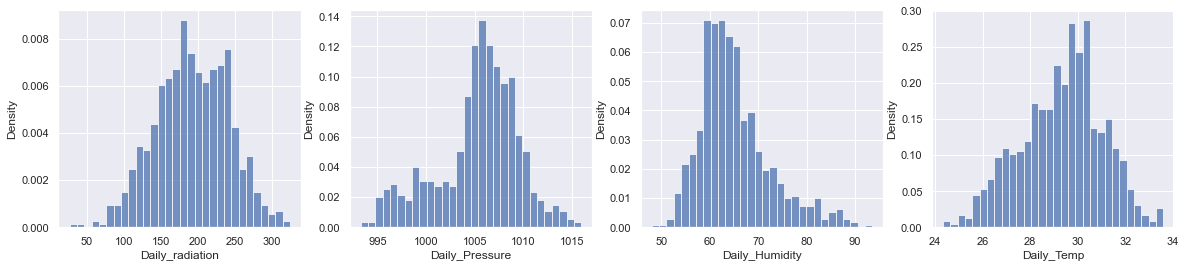

In [8]:
# histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

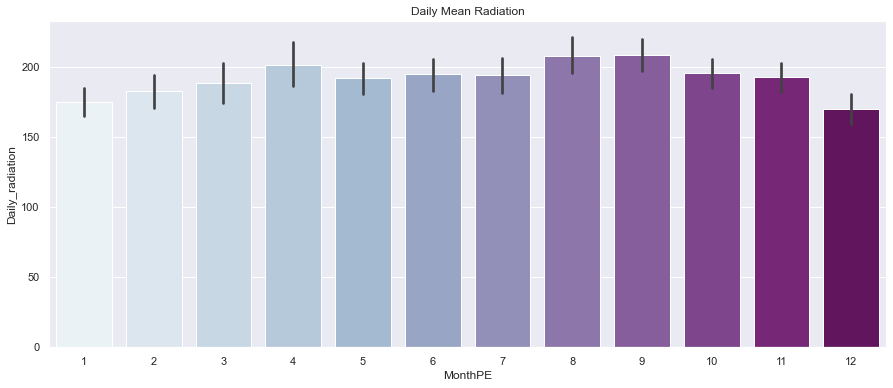

In [9]:
# histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

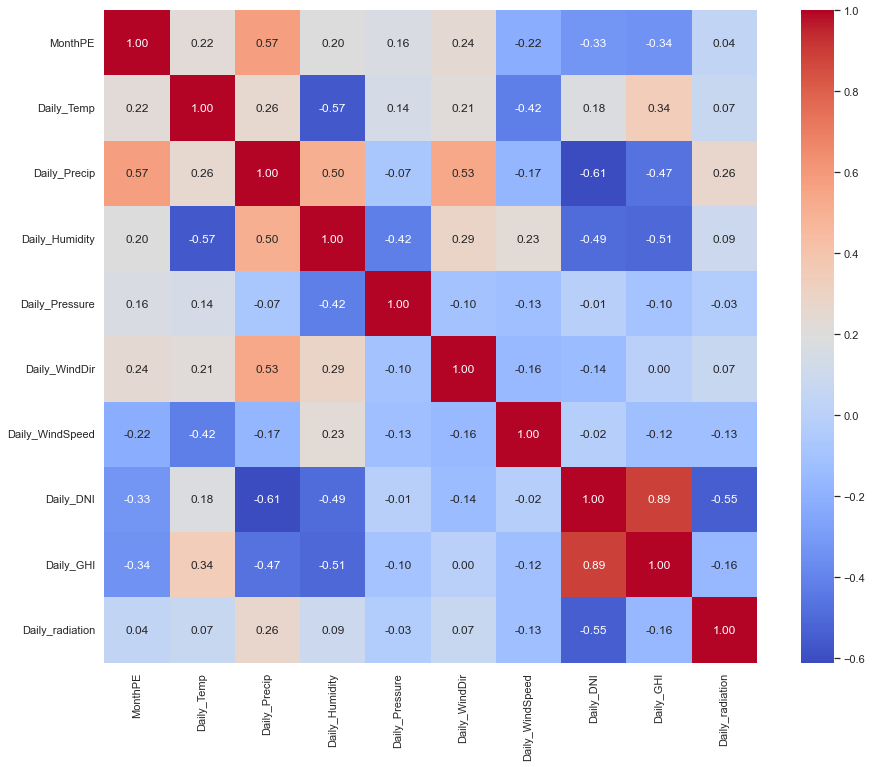

In [10]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

### Statistical check: stationary or non-stationary

In [13]:
# adfuller test on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) 

# good value for p-value is <= 0.05

ADF Statistic: -12.329218
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [ ]:
# convert to logarithm scale and test
from math import log
Xrad = cleaned_df['Daily_radiation'].values.astype(int)
Xrad_log = log(Xrad)

# adfuller test
result= adfuller(Xrad_log)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [35]:
# calculated daily shift in radiation
rad_data = cleaned_df['Daily_radiation'] - cleaned_df['Daily_radiation'].shift(1)

In [36]:
# adfuller test day shifted feature
X_shift = rad_data[1:].values
result = adfuller(X_shift)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.027716
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
